# Video Intro


In [2]:
(ns talented-silence
  (:require
    [opencv4.core :refer :all]
    [opencv4.video :as v]
    [opencv4.colors.rgb :as rgb]
    [opencv4.utils :as u]))

nil

### a la mano

In [3]:
(def capture (v/new-videocapture))
(.open capture 0)

(def window
 (u/show (new-mat 200 200 CV_8UC3 rgb/black)))

(def buffer (new-mat))
(dotimes [i 200]
 (.read capture buffer)
 (u/re-show
  window
  buffer))

(.release capture)

CompilerException java.awt.HeadlessException: 
No X11 DISPLAY variable was set, but this program performed an operation which requires it., compiling:(form-init7094851474594882885.clj:5:2) 
IllegalArgumentException No matching field found: getComponents for class org.opencv.core.Mat  clojure.lang.Reflector.getInstanceField (Reflector.java:271)


class java.lang.IllegalArgumentException: 

#### simple streaming

In [4]:
(u/simple-cam-window identity)

HeadlessException 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.  java.awt.GraphicsEnvironment.checkHeadless (GraphicsEnvironment.java:204)


class java.awt.HeadlessException: 

In [5]:
(u/simple-cam-window 
  #(put-text! % (str (java.util.Date.)) 
              (new-point 10 10) FONT_HERSHEY_PLAIN 1 rgb/white 1))

HeadlessException 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.  java.awt.GraphicsEnvironment.checkHeadless (GraphicsEnvironment.java:204)


class java.awt.HeadlessException: 

In [6]:
(u/simple-cam-window #(apply-color-map! % COLORMAP_HOT))

HeadlessException 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.  java.awt.GraphicsEnvironment.checkHeadless (GraphicsEnvironment.java:204)


class java.awt.HeadlessException: 

### my function

In [7]:
(defn my-fn![mat]
  (-> mat 
    (u/resize-by 0.5) 
    (apply-color-map! COLORMAP_WINTER)
    (put-text! (str (java.util.Date.)) (new-point 10 50) FONT_HERSHEY_PLAIN 1 rgb/white 1)  ))


#'talented-silence/my-fn!

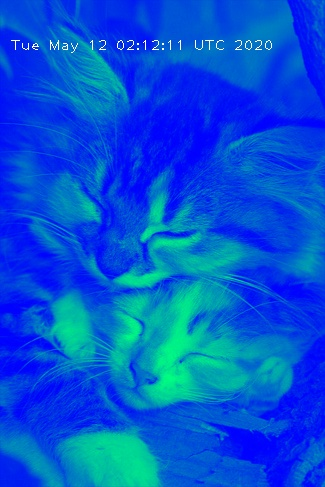

In [8]:
(-> "resources/chapter03/ai5.jpg"
 	imread
    my-fn!
    u/>>>)

In [9]:
(u/simple-cam-window my-fn!)

HeadlessException 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.  java.awt.GraphicsEnvironment.checkHeadless (GraphicsEnvironment.java:204)


class java.awt.HeadlessException: 

### streaming with window settings

In [10]:
(u/simple-cam-window 
 {:frame {:color "#ffcc88", :title "video", :width 350, :height 300} 
  :video {:device 0, :width 200, :height 240}}
  identity)

NullPointerException   clojure.lang.Reflector.boxArg (Reflector.java:448)


class java.lang.NullPointerException: 

### simple resize

In [11]:
(defn my-fn[mat]
  (-> mat 
    (put-text! (str (java.util.Date.)) (new-point 100 50) FONT_HERSHEY_PLAIN 2 rgb/white 1)
    (u/resize-by 0.7) 
    (apply-color-map! COLORMAP_AUTUMN)))

(u/simple-cam-window my-fn)

HeadlessException 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.  java.awt.GraphicsEnvironment.checkHeadless (GraphicsEnvironment.java:204)


class java.awt.HeadlessException: 

### resize, text, and colormap

In [13]:
(u/simple-cam-window 
  (fn[buffer] (-> 
                buffer 
                (put-text! (str (java.util.Date.)) (new-point 100 50) FONT_HERSHEY_PLAIN 2 rgb/white 1)
                (u/resize-by 0.7) 
                (apply-color-map! COLORMAP_OCEAN)
                )))

HeadlessException 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.  java.awt.GraphicsEnvironment.checkHeadless (GraphicsEnvironment.java:204)


class java.awt.HeadlessException: 

### high low

In [14]:
; from change colors
(defn low-high!
  ([image t1 color1 color2 ]
    (low-high! image t1 255 THRESH_BINARY color1 t1 255 THRESH_BINARY_INV color2))
  ([image a1 a2 a3 color1 b1 b2 b3 color2 ]
  (let [_copy (-> image clone (cvt-color! COLOR_BGR2HSV))
        _work (clone image)
        _thresh-1 (new-mat)
        _thresh-2 (new-mat)]

    (threshold _copy _thresh-1 a1 a2 a3)
    (cvt-color! _thresh-1 COLOR_BGR2GRAY)
    (set-to _work color1 _thresh-1)

    (threshold _copy _thresh-2 b1 b2 b3)
    (cvt-color! _thresh-2 COLOR_BGR2GRAY)
    (set-to _work color2 _thresh-2)
    _work)))

#'talented-silence/low-high!

In [15]:
; rewrite
(defn high-low
  ([resize-factor color-limit c11 c12 c21 c22 buffer]
  (let [ buffer-1 (-> buffer (u/resize-by resize-factor))
         buffer-2 (clone buffer-1)
         output (new-mat)]
  (vconcat [
    (low-high! buffer-1 90 c11 c12)
    (low-high! buffer-2 90 c21 c22)
    ] output)
    output)))

(def high-low-0
  (partial high-low 0.5 90 rgb/violetred rgb/wheat rgb/violetred-4 rgb/papayawhip))
(def high-low-1
  (partial high-low 0.5 90 rgb/gray rgb/blue rgb/orange rgb/green))
(def high-low-2
  (partial high-low 0.75 90 rgb/crimson rgb/skyblue-1 rgb/green rgb/orange))

(u/simple-cam-window high-low-1)

HeadlessException 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.  java.awt.GraphicsEnvironment.checkHeadless (GraphicsEnvironment.java:204)


class java.awt.HeadlessException: 

### find red

In [17]:

(defn find-red[ buffer ]
   (let [
    work (new-mat)
    mat1 (new-mat)
    output (new-mat)
    ]
  (->  buffer
  (cvt-color! COLOR_BGR2HSV)
  (in-range! (new-scalar 0 30 30) (new-scalar 30 255 255) work))
     
  (copy-to buffer output work)
  (cvt-color output output COLOR_HSV2BGR))
  )

(u/simple-cam-window find-red)

HeadlessException 
No X11 DISPLAY variable was set, but this program performed an operation which requires it.  java.awt.GraphicsEnvironment.checkHeadless (GraphicsEnvironment.java:204)


class java.awt.HeadlessException: 

### recording

In [18]:
 (let[ outputVideo (v/new-videowriter)]
  (.open
    outputVideo
    (first args)
    ;(VideoWriter/fourcc \M \J \P \G)
    1196444237
    30
    (new-size 240 320) ;
    )

  (u/simple-cam-window
    (fn [buffer]
     (let [ r (u/resize-by buffer 0.5) o (clone r)]
     (.write outputVideo (rotate! r ROTATE_90_CLOCKWISE))
     o)))
  ;(.release outputVideo)
)

CompilerException java.lang.RuntimeException: Unable to resolve symbol: args in this context, compiling:(/tmp/form-init7094851474594882885.clj:4:5) 


class clojure.lang.Compiler$CompilerException: 